In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import datetime
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
#from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

In [3]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [4]:
# Create the Alpaca API object
# YOUR CODE HERE!
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [5]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2020-02-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-03-05', tz='America/New_York').isoformat()

## TSLA StockNEWWWWWWW

In [6]:
#TSLA Stock 

timeframe = '1Day'
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
#tickers = ["TSLA", "BTCUSD", "DOGEUSD"]
tickers = ["TSLA"]

TSLA_df = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df


In [7]:
# Separate ticker data"
# YOUR CODE HERE!

#TSLA = stock_df[stock_df['symbol']=="TSLA"].drop('symbol', axis=1)
#BTCUSD = df_ticker[df_ticker['symbol']=="BTCUSD"].drop('symbol', axis=1)
#DOGEUSD = df_ticker[df_ticker['symbol']=="DOGEUSD"].drop('symbol', axis=1)

In [8]:
# Concatenate the ticker DataFrames
# YOUR CODE HERE!
#stock_df = pd.concat([TSLA], axis=1, keys=["TSLA"])
#stock_df = pd.concat([TSLA, BTCUSD, DOGEUSD], axis=1, keys=["TSLA", "BTCUSD", "DOGEUSD"])

# Display sample data
#stock_df.head()

In [9]:
TSLA_df.index.date
TSLA_df.index = TSLA_df.index.date
TSLA_df

,open,high,low,close,volume,trade_count,vwap,symbol
2020-02-03,673.69,786.1400,673.5200,780.00,47316151,837249,737.432873,TSLA
2020-02-04,883.76,968.9899,833.8800,887.06,61049460,1287721,904.706960,TSLA
2020-02-05,823.39,845.9800,704.1106,734.70,48453586,1033190,764.153427,TSLA
2020-02-06,700.12,795.8300,687.0000,748.96,39881797,804002,748.461750,TSLA
2020-02-07,730.09,769.7500,730.0000,748.07,17132210,329931,746.772772,TSLA
...,...,...,...,...,...,...,...,...
2022-02-28,815.72,876.8600,814.7075,870.43,32122124,848292,855.749058,TSLA
2022-03-01,869.97,889.8800,853.7800,864.37,24157613,648573,867.666133,TSLA
2022-03-02,872.13,886.4800,844.2721,879.89,24402912,672823,865.953218,TSLA
2022-03-03,878.32,886.4390,832.6001,839.29,20038426,627576,855.201770,TSLA


In [10]:
tsla_symbol = TSLA_df['symbol']
tsla_symbol

2020-02-03    TSLA
2020-02-04    TSLA
2020-02-05    TSLA
2020-02-06    TSLA
2020-02-07    TSLA
              ... 
2022-02-28    TSLA
2022-03-01    TSLA
2022-03-02    TSLA
2022-03-03    TSLA
2022-03-04    TSLA
Name: symbol, Length: 527, dtype: object

In [11]:
tsla_df_close_price = TSLA_df['close']
#tsla_df_close = tsla_df_close_price.pct_change('close')
tsla_df_close_price


2020-02-03    780.00
2020-02-04    887.06
2020-02-05    734.70
2020-02-06    748.96
2020-02-07    748.07
               ...  
2022-02-28    870.43
2022-03-01    864.37
2022-03-02    879.89
2022-03-03    839.29
2022-03-04    838.29
Name: close, Length: 527, dtype: float64

In [12]:
tsla_df_close_PCT =tsla_df_close_price.pct_change()
tsla_df_close_PCT

2020-02-03         NaN
2020-02-04    0.137256
2020-02-05   -0.171758
2020-02-06    0.019409
2020-02-07   -0.001188
                ...   
2022-02-28    0.074777
2022-03-01   -0.006962
2022-03-02    0.017955
2022-03-03   -0.046142
2022-03-04   -0.001191
Name: close, Length: 527, dtype: float64

In [13]:
TSLA_df = pd.concat([tsla_symbol, tsla_df_close_PCT], axis="columns", join="inner")
TSLA_df.rename(columns={'close':'PCT_CLOSE'}, inplace=True)
TSLA_df.index.rename('Date', inplace=True)
TSLA_df.to_csv('symbol_TSLA_PCT_close.csv')

## All keywords Count Correlation to TSLA

In [14]:
Tweet_count = pd.read_csv('tsla_retweet_likes_PCT.csv')
Tweet_count

,Unnamed: 0,Date,Tweet,retweet_PCT,likes_PCT
0,986,2021-12-29,Ashok was the first person recruited from my t...,1.037543,1.440332
1,987,2021-12-26,Or Tesla!,-0.949462,-0.883441
2,988,2021-12-25,That was a crazy tough year. Tesla financing c...,1.574074,0.450347
3,989,2021-12-24,Tesla holiday software update goes to wide rel...,17.116883,13.441608
4,990,2021-12-24,Tesla is technically a car like an iPhone is t...,-0.754301,-0.827528
...,...,...,...,...,...
252,1238,2022-01-14,Tesla merch buyable with Dogecoin,132.661499,30.449022
253,1239,2022-01-12,Tesla is working as fast as possible to suppor...,-0.879063,-0.720739
254,1240,2022-01-08,It was a mistake to try to use the Elise. In t...,-0.526462,-0.653208
255,1241,2022-01-08,Tesla FSD price rising to $12k on Jan 17,3.151203,1.608825


In [15]:
tweet_count_only = Tweet_count[['Date','likes_PCT']]
tweet_count_only.sort_values(by="Date")

,Date,likes_PCT
197,2021-01-02,7.320890
198,2021-01-02,-0.606912
196,2021-01-02,1.232679
195,2021-01-09,-0.948710
194,2021-01-10,1.937830
...,...,...
202,2022-03-03,0.248448
231,2022-03-03,0.248631
201,2022-03-03,0.386835
228,2022-03-05,-0.617983


In [16]:
tweet_count_date = tweet_count_only.groupby('Date').sum()
tweet_count_date

,likes_PCT
Date,
2021-01-02,7.946657
2021-01-09,-0.948710
2021-01-10,1.937830
2021-01-25,20.503827
2021-01-30,-0.371630
...,...
2022-02-21,5.626773
2022-02-23,0.427518
2022-03-02,100.304813


In [17]:
#mapbox_average_values_location = pd.concat([tweet_count_date, tsla_count], axis=1)
#tweet_count_date.join(tsla_count)
#tweet_count_date.merge(tsla_count, left_index=True, right_index=True)
result = pd.merge(tweet_count_date, TSLA_df, on='Date')
result

,likes_PCT,symbol,PCT_CLOSE
Date,,,


In [18]:
corr_returns = result.corr()
corr_returns

,likes_PCT,PCT_CLOSE
likes_PCT,NaN,NaN
PCT_CLOSE,NaN,NaN


<AxesSubplot:>

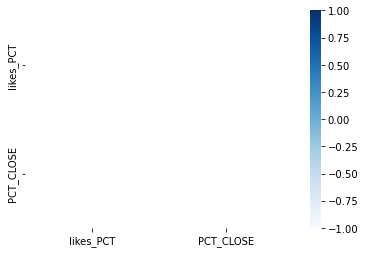

In [19]:
# Display de correlation matrix
sns.heatmap(corr_returns, vmin = -1, vmax = 1, annot=True, cmap="Blues")

## DOGEUSE Data NENWWWWWWW

In [20]:
# Set timeframe to "1Day"
timeframe = "1Day"
# Set start and end datetimes of 1 year, between now and 365 days ago.
start_date = pd.Timestamp('2020-02-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-03-05', tz='America/New_York').isoformat()
# Set the stock tickers
#tickers_stock = ["TSLA","AAPL"]
DOGE_ticker = ["DOGEUSD"]

In [21]:
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [22]:
DOGE_ticker = alpaca.get_crypto_bars(
    DOGE_ticker,
    timeframe,
    start=start_date,
    end=end_date
).df
# Display sample data
#DOGE_ticker.tail()


In [23]:
DOGE_ticker.index.date
DOGE_ticker.index = DOGE_ticker.index.date
DOGE_ticker

,exchange,open,high,low,close,volume,trade_count,vwap,symbol
2021-01-12,FTXU,0.008014,0.008014,0.008014,0.008014,1,1,0.008014,DOGEUSD
2021-01-13,FTXU,0.008308,0.008623,0.008308,0.008493,6131,3,0.008339,DOGEUSD
2021-01-14,FTXU,0.009505,0.009505,0.009505,0.009505,377,1,0.009505,DOGEUSD
2021-01-15,FTXU,0.009803,0.009803,0.009191,0.009328,9134,9,0.009651,DOGEUSD
2021-01-16,FTXU,0.009521,0.009521,0.009521,0.009521,3031,1,0.009521,DOGEUSD
...,...,...,...,...,...,...,...,...,...
2022-02-28,FTXU,0.122440,0.134868,0.121512,0.132276,3854219,1613,0.129026,DOGEUSD
2022-03-01,FTXU,0.132272,0.139052,0.129945,0.134022,4062718,1721,0.133781,DOGEUSD
2022-03-02,FTXU,0.133770,0.137254,0.130748,0.132299,4054118,1017,0.133353,DOGEUSD
2022-03-03,FTXU,0.132103,0.133382,0.124908,0.125224,2324649,604,0.128094,DOGEUSD


In [24]:
DOGETICK = DOGE_ticker['close']
DOGETICK.to_csv('DOGE_close.csv')

In [25]:
DOGE_symbol = DOGE_ticker['symbol']
DOGE_symbol

2021-01-12    DOGEUSD
2021-01-13    DOGEUSD
2021-01-14    DOGEUSD
2021-01-15    DOGEUSD
2021-01-16    DOGEUSD
               ...   
2022-02-28    DOGEUSD
2022-03-01    DOGEUSD
2022-03-02    DOGEUSD
2022-03-03    DOGEUSD
2022-03-04    DOGEUSD
Name: symbol, Length: 417, dtype: object

In [26]:
doge_df_close_price = DOGE_ticker['close']
#tsla_df_close = tsla_df_close_price.pct_change('close')
doge_df_close_PCT =doge_df_close_price.pct_change()
doge_df_close_PCT

2021-01-12         NaN
2021-01-13    0.059770
2021-01-14    0.119098
2021-01-15   -0.018518
2021-01-16    0.020636
                ...   
2022-02-28    0.074833
2022-03-01    0.013200
2022-03-02   -0.012856
2022-03-03   -0.053481
2022-03-04   -0.020595
Name: close, Length: 417, dtype: float64

In [27]:
DOGE_df = pd.concat([DOGE_symbol, doge_df_close_PCT], axis="columns", join="inner")
DOGE_df.rename(columns={'close':'PCT_CLOSE'}, inplace=True)
DOGE_df.index.rename('Date', inplace=True)
DOGE_df.to_csv('symbol_DOGE_PCT_close.csv')

## BITUSE Data

In [28]:
# Set timeframe to "1Day"
timeframe = "1Day"
# Set start and end datetimes of 1 year, between now and 365 days ago.
start_date = pd.Timestamp('2020-02-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-03-05', tz='America/New_York').isoformat()
# Set the stock tickers
#tickers_stock = ["TSLA","AAPL"]
BITcoin_ticker = ["BTCUSD"]

In [29]:
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [30]:
BITcoin_ticker = alpaca.get_crypto_bars(
    BITcoin_ticker,
    timeframe,
    start=start_date,
    end=end_date
).df
# Display sample data
BITcoin_ticker.tail()

,exchange,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,,
2022-03-03 06:00:00+00:00,ERSX,43270.00,44061.00,41023.10,41308.60,735.774274,684,42530.161667,BTCUSD
2022-03-03 06:00:00+00:00,FTXU,43333.00,44080.00,41096.00,41379.00,2073.353500,6470,42608.014239,BTCUSD
2022-03-04 06:00:00+00:00,CBSE,41372.59,41909.42,38577.01,39016.63,20725.135615,649121,40280.069915,BTCUSD
2022-03-04 06:00:00+00:00,ERSX,41388.40,41908.70,38646.60,38976.00,95.639394,101,40762.999598,BTCUSD
2022-03-04 06:00:00+00:00,FTXU,41396.00,41900.00,38527.00,39000.00,2901.744200,9135,40145.076827,BTCUSD


In [31]:
Bit = BITcoin_ticker[BITcoin_ticker.exchange.str.contains('FTXU',case=False)]
Bit

,exchange,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,,
2020-04-08 05:00:00+00:00,FTXU,7314.0,7314.0,7314.0,7314.0,0.0001,1,7314.000000,BTCUSD
2020-04-14 05:00:00+00:00,FTXU,7101.5,7101.5,7100.0,7100.0,0.0002,2,7100.750000,BTCUSD
2020-04-22 05:00:00+00:00,FTXU,7118.5,7118.5,7118.5,7118.5,0.0001,1,7118.500000,BTCUSD
2020-04-28 05:00:00+00:00,FTXU,7748.5,7836.0,7748.5,7836.0,0.0840,2,7835.687500,BTCUSD
2020-04-30 05:00:00+00:00,FTXU,8829.0,8829.0,8653.0,8653.0,0.0134,3,8715.805970,BTCUSD
...,...,...,...,...,...,...,...,...,...
2022-02-28 06:00:00+00:00,FTXU,37866.0,44340.0,37494.0,43241.0,2817.0080,10116,40876.451861,BTCUSD
2022-03-01 06:00:00+00:00,FTXU,43200.0,44962.0,42876.0,44286.0,2202.3019,8476,44056.139452,BTCUSD
2022-03-02 06:00:00+00:00,FTXU,44283.0,45343.0,43232.0,43401.0,1872.2232,6481,44009.233991,BTCUSD


In [32]:
Bit.index.date
Bit.index = Bit.index.date
Bit

,exchange,open,high,low,close,volume,trade_count,vwap,symbol
2020-04-08,FTXU,7314.0,7314.0,7314.0,7314.0,0.0001,1,7314.000000,BTCUSD
2020-04-14,FTXU,7101.5,7101.5,7100.0,7100.0,0.0002,2,7100.750000,BTCUSD
2020-04-22,FTXU,7118.5,7118.5,7118.5,7118.5,0.0001,1,7118.500000,BTCUSD
2020-04-28,FTXU,7748.5,7836.0,7748.5,7836.0,0.0840,2,7835.687500,BTCUSD
2020-04-30,FTXU,8829.0,8829.0,8653.0,8653.0,0.0134,3,8715.805970,BTCUSD
...,...,...,...,...,...,...,...,...,...
2022-02-28,FTXU,37866.0,44340.0,37494.0,43241.0,2817.0080,10116,40876.451861,BTCUSD
2022-03-01,FTXU,43200.0,44962.0,42876.0,44286.0,2202.3019,8476,44056.139452,BTCUSD
2022-03-02,FTXU,44283.0,45343.0,43232.0,43401.0,1872.2232,6481,44009.233991,BTCUSD
2022-03-03,FTXU,43333.0,44080.0,41096.0,41379.0,2073.3535,6470,42608.014239,BTCUSD


In [33]:
BIT_symbol = Bit['symbol']
BIT_symbol

2020-04-08    BTCUSD
2020-04-14    BTCUSD
2020-04-22    BTCUSD
2020-04-28    BTCUSD
2020-04-30    BTCUSD
               ...  
2022-02-28    BTCUSD
2022-03-01    BTCUSD
2022-03-02    BTCUSD
2022-03-03    BTCUSD
2022-03-04    BTCUSD
Name: symbol, Length: 666, dtype: object

In [34]:
bit_df_close_price = Bit['close']
#tsla_df_close = tsla_df_close_price.pct_change('close')
bit_df_close_price =bit_df_close_price.pct_change()
bit_df_close_price

2020-04-08         NaN
2020-04-14   -0.029259
2020-04-22    0.002606
2020-04-28    0.100794
2020-04-30    0.104262
                ...   
2022-02-28    0.143458
2022-03-01    0.024167
2022-03-02   -0.019984
2022-03-03   -0.046589
2022-03-04   -0.057493
Name: close, Length: 666, dtype: float64

In [35]:
BITCOIN_df = pd.concat([BIT_symbol, bit_df_close_price], axis="columns", join="inner")
BITCOIN_df.rename(columns={'close':'PCT_CLOSE'}, inplace=True)
BITCOIN_df.index.rename('Date', inplace=True)
BITCOIN_df.to_csv('symbol_BITCOIN_PCT_close.csv')